# Load the loss values on subsets

In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [4]:
from methylVA.utils.common import load_config
from methylVA.data_processing.utils import load_data_tensor, load_train_test_data, sample_data
from methylVA.plots.loss_convergence import plot_training_and_validation_losses
import numpy as np
from methylVA.training.load_vae import load_trained_vae
from methylVA.training.trainer_utils import reconstruct_data, correlation_between_rows


config = load_config("../methylVA/configs/random_data_zero_config.yaml")
file_paths = [ f"../experiments/random_data_zero_vae/vae/version_{i}/metrics.csv" for i in range(4)]
hparams_paths = [ f'../experiments/random_data_zero_vae/vae/version_{i}/hparams.yaml' for i in range(4)]
checkpoint_paths = ["../experiments/random_data_zero_vae/vae/version_0/checkpoints/vae-epoch=02-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_1/checkpoints/vae-epoch=04-val_loss=3.56.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_2/checkpoints/vae-epoch=19-val_loss=0.05.ckpt",
                    "../experiments/random_data_zero_vae/vae/version_3/checkpoints/vae-epoch=19-val_loss=0.07.ckpt"]


In [ ]:
load_config(hparams_path)

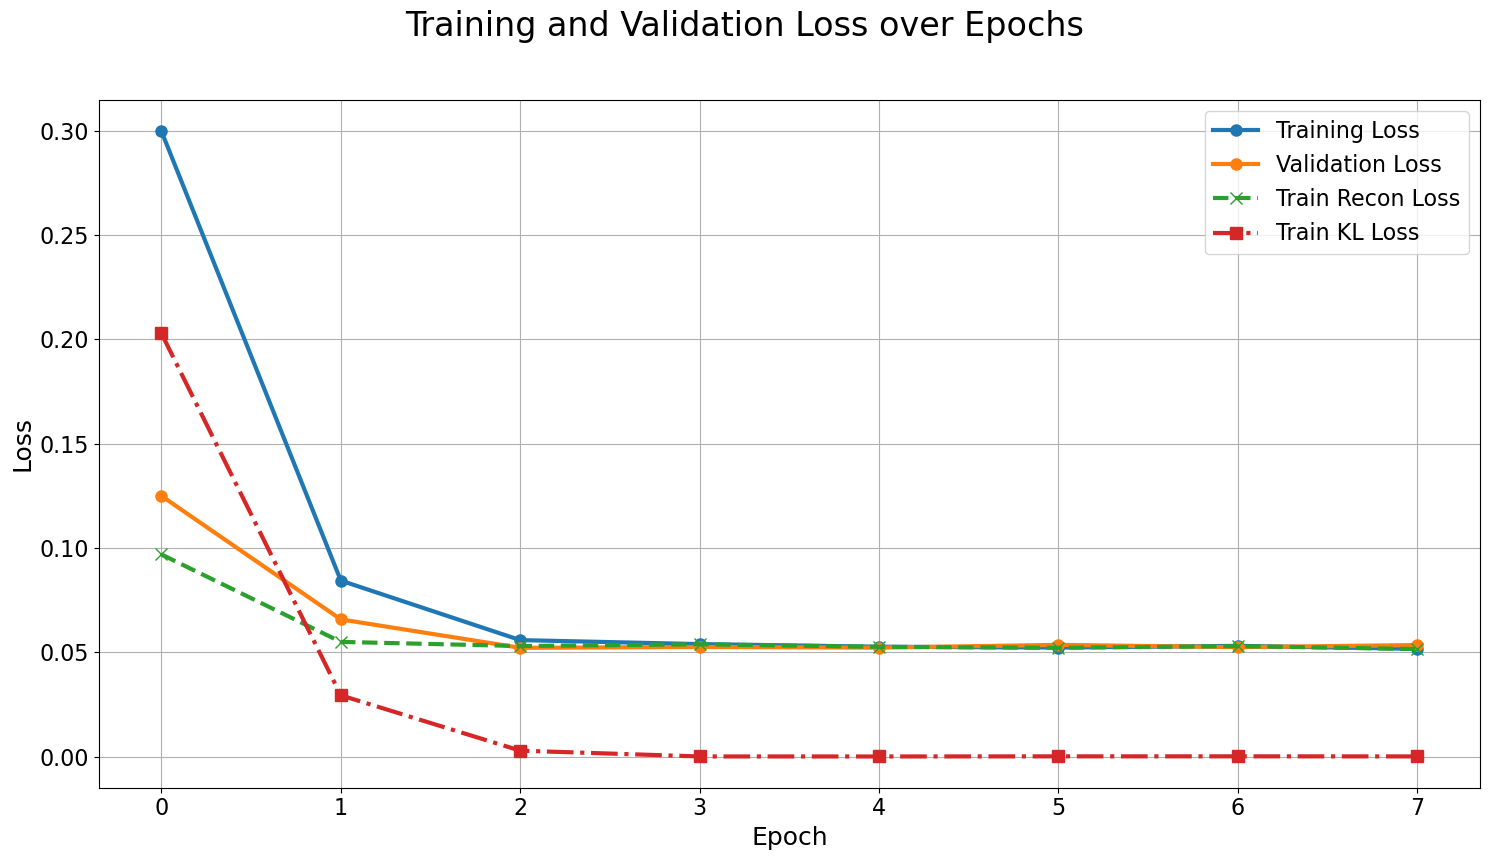

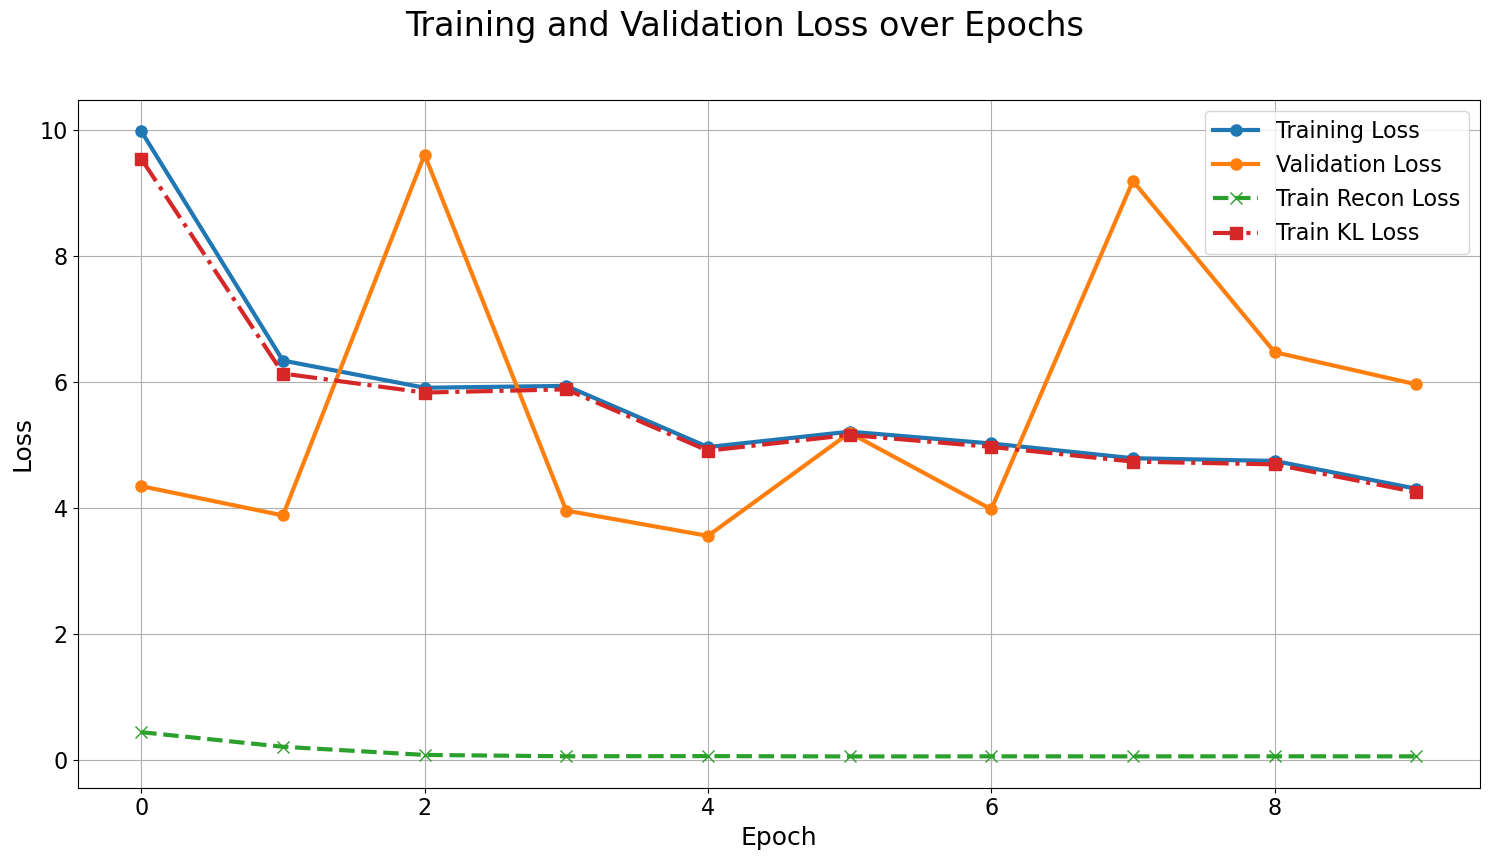

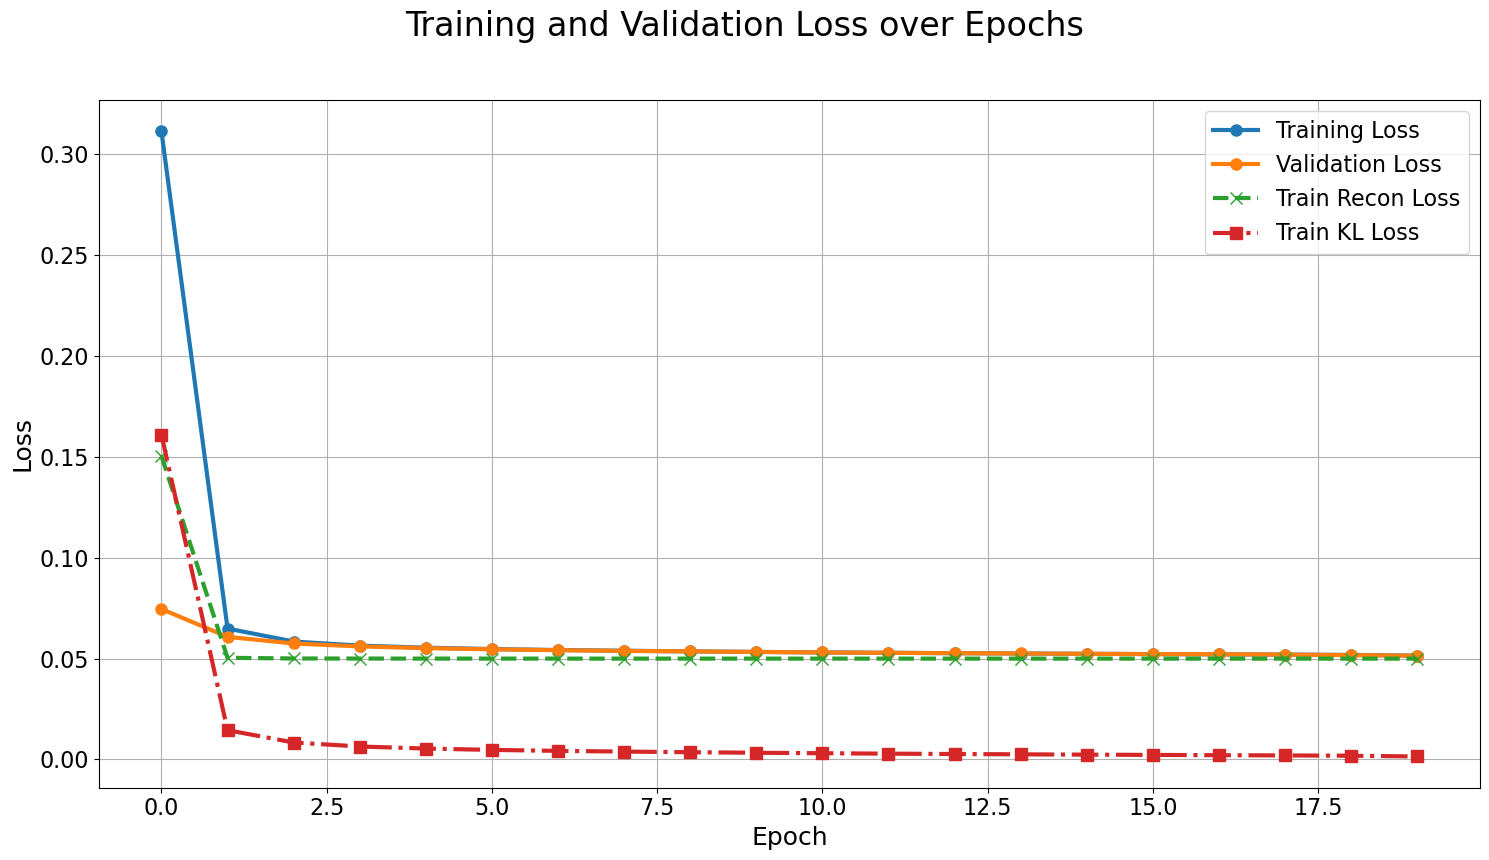

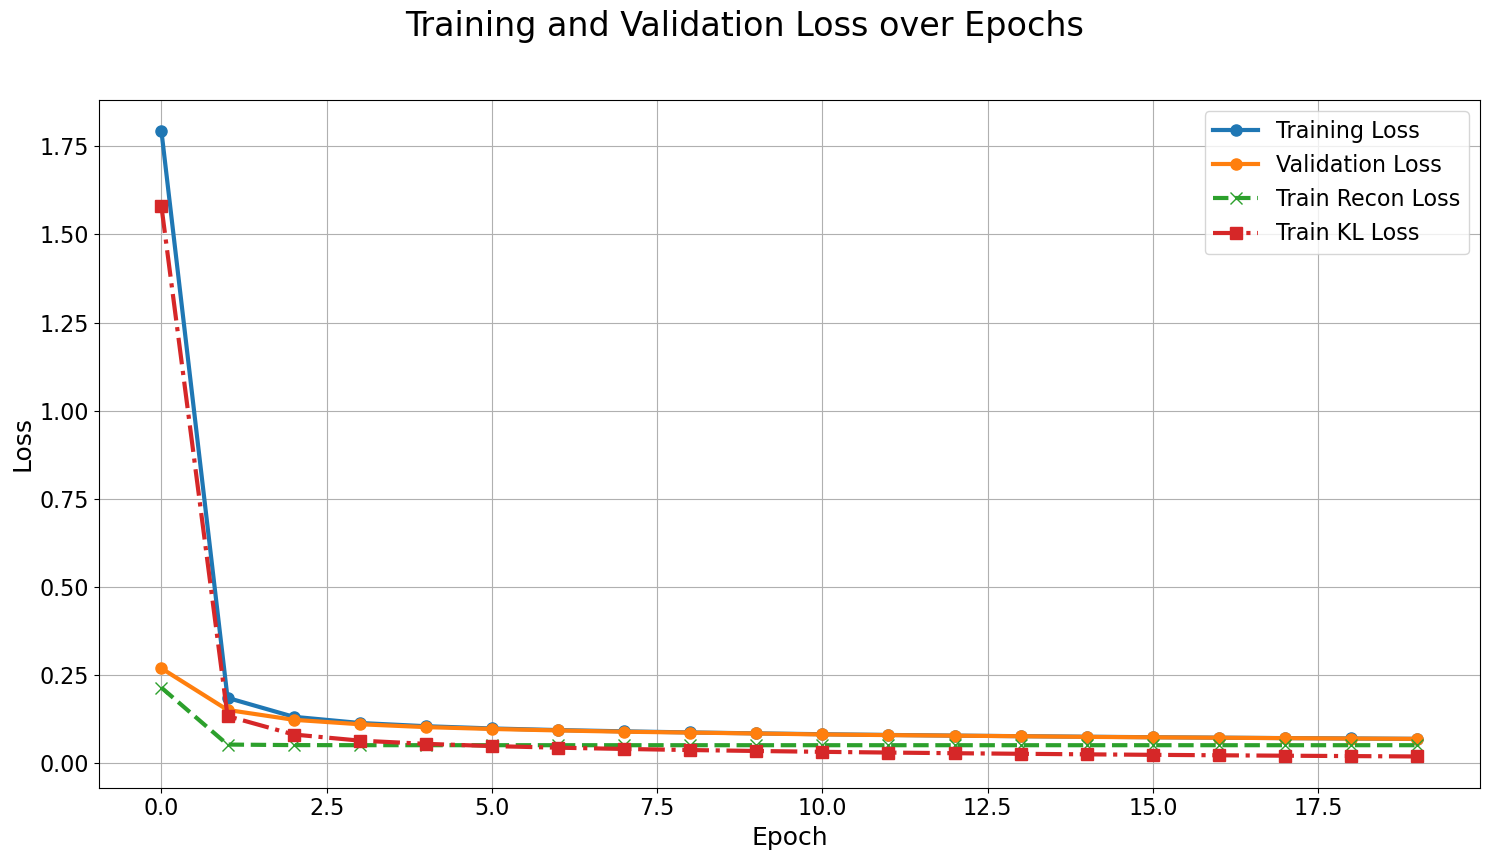

In [5]:
for file_path in file_paths:
    plot_training_and_validation_losses(file_path)

In [ ]:
config_training = config['training_vae']
train_loader, val_loader, test_loader = load_data_tensor(config_training)
vae_model = load_trained_vae(checkpoint_path, hparams_path)


X_train, y_train, X_val, y_val, X_test, y_test = load_train_test_data(config_training)
X_train, X_val, X_test = X_train.values, X_val.values, X_test.values

In [9]:
for hparams_path in hparams_paths:
    print(load_config(hparams_path))

{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 1.0, 'latent_dim': 1024, 'lr': 0.0001}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 1.0, 'latent_dim': 1024, 'lr': 0.001}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 1.0, 'latent_dim': 1024, 'lr': 1e-05}
{'activation': 'tanh', 'batch_norm': True, 'dropout_rate': 0.0, 'hidden_dims': [10000, 5000, 2048], 'input_dim': 20000, 'kl_weight': 10.0, 'latent_dim': 1024, 'lr': 1e-05}


In [30]:
# Reconstruct selected rows of training data
original_matrix, reconstructed_matrix = reconstruct_data(vae_model, X_train, num_rows=10)

# Print the original and reconstructed matrices
print("Original Matrix:\n", original_matrix)
print("Reconstructed Matrix:\n", reconstructed_matrix)


Original Matrix:
 [[ 0.          0.          0.         ... -0.57030208 -0.28281668
   1.11659775]
 [ 0.          0.          0.         ...  1.78718573  0.95589734
  -0.16335681]
 [ 0.          0.          0.         ...  1.27330407  1.35686545
   0.37270819]
 ...
 [ 0.          0.          0.         ...  0.20464296 -0.94659825
  -0.37488782]
 [ 0.          0.          0.         ...  0.7532192  -0.03652755
   1.22360081]
 [ 0.          0.          0.         ...  0.00647108  1.40046716
   3.28979678]]
Reconstructed Matrix:
 [[0.00656059 0.00660391 0.00581741 ... 0.00734712 0.01374227 0.00637576]
 [0.00514605 0.00518398 0.00503771 ... 0.00607887 0.01181909 0.00583223]
 [0.00828291 0.0079148  0.00811682 ... 0.00992181 0.02019158 0.01040988]
 ...
 [0.00366491 0.00392017 0.00385715 ... 0.00404879 0.00905496 0.00424052]
 [0.0036289  0.00378276 0.00362154 ... 0.00460231 0.00991567 0.00441995]
 [0.01865753 0.01814309 0.01945053 ... 0.01896772 0.03328178 0.01956079]]


In [31]:
cor = correlation_between_rows(original_matrix, reconstructed_matrix)


In [32]:
print(f"maximum correlation: {np.max(cor)}")
print(f"median correlation: {np.median(cor)}")

maximum correlation: 0.05342454432337337
median correlation: 0.026671688081430948
